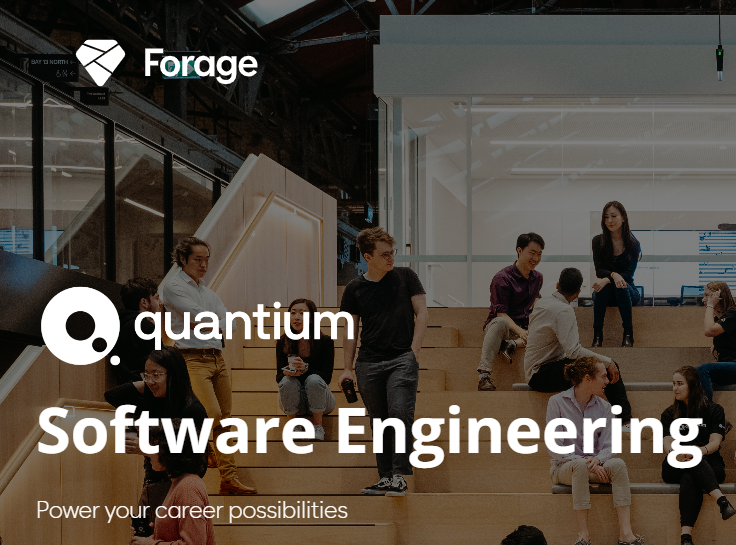


# Quantium Software Engineering virtual experience program
Analysis to answer!

<div class="alert alert-block alert-info">
<b>Soul Foods’s question: :</b> "Were sales higher before or after the Pink Morsel price increase on the 15th of January, 2021?"
</div>


## Prepare Data


### Data Processing

In [1]:
# Importing necessary libraries
import pandas as pd

from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px

import plotly.graph_objects as go

C:\Users\admin\AppData\Local\Temp\ipykernel_1916\3345501613.py:5: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
C:\Users\admin\AppData\Local\Temp\ipykernel_1916\3345501613.py:6: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


In [2]:
# File paths
file1 = 'daily_sales_data_0.csv'
file2 = 'daily_sales_data_1.csv'
file3 = 'daily_sales_data_2.csv'

# Read CSV files
df0 = pd.read_csv(file1)
df1 = pd.read_csv(file2)
df2 = pd.read_csv(file3)

# Merge horizontally
df = pd.concat([df0, df1, df2], axis=0)

# Display the merged DataFrame
print(df.head())


       product  price  quantity        date region
0  pink morsel  $3.00       546  2018-02-06  north
1  pink morsel  $3.00       549  2018-02-06  south
2  pink morsel  $3.00       577  2018-02-06   east
3  pink morsel  $3.00       519  2018-02-06   west
4  gold morsel  $9.99       580  2018-02-06  north


#### Tasks

In [3]:
# Only interested in pink morsel [column == product]
df = df[df['product']== 'pink morsel']
# Reset the index
df = df.reset_index(drop=True)

df['product'].unique()

array(['pink morsel'], dtype=object)

In [4]:
# Combine price & quantity to form sales
    # Remove the dollar sign and convert "price" to numeric
df['price'] = df['price'].str.replace('$', '').astype(float)

# Calculate the sales column
df['sales'] = df['price'] * df['quantity']

df.head()

C:\Users\admin\AppData\Local\Temp\ipykernel_1916\727144599.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price'] = df['price'].str.replace('$', '').astype(float)


,product,price,quantity,date,region,sales
0,pink morsel,3.0,546,2018-02-06,north,1638.0
1,pink morsel,3.0,549,2018-02-06,south,1647.0
2,pink morsel,3.0,577,2018-02-06,east,1731.0
3,pink morsel,3.0,519,2018-02-06,west,1557.0
4,pink morsel,3.0,529,2018-02-07,north,1587.0


In [5]:
# rearranging to suit condition
df = df[['sales', 'date', 'region']]
df.head()

,sales,date,region
0,1638.0,2018-02-06,north
1,1647.0,2018-02-06,south
2,1731.0,2018-02-06,east
3,1557.0,2018-02-06,west
4,1587.0,2018-02-07,north


## Visualization 

### Create a Dash Application

In [6]:
# Sort the DataFrame by date
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')

# Identify the index of the price increase date
price_increase_date = '2021-01-15'
price_increase_index = df[df['date'] == price_increase_date].index[0]

# Define custom colors
sales_color = '#1f77b4'  # Blue color for sales line
price_increase_color = '#ff7f0e'  # Orange color for price increase line

# Define custom background styles
background_color = '#f7f7f7'  # Light gray background color
title_style = {'text-align': 'center', 'color': '#333333'}  # Custom title style
chart_style = {'backgroundColor': '#ffffff', 'border': '1px solid #dddddd'}  # Custom chart style

# Create a JupyterDash application
app = JupyterDash(__name__)

# Define the layout of the application
app.layout = html.Div(
    style={'backgroundColor': background_color},
    children=[
        html.H1("Impact of Price Increase on Sales", style=title_style),
        dcc.Graph(
            figure=go.Figure(
                data=[
                    go.Scatter(x=df['date'], y=df['sales'], mode='lines', name='Sales',
                               line=dict(color=sales_color)),
                    go.Scatter(x=[price_increase_date, price_increase_date], y=[0, df['sales'].max()],
                               mode='lines', name='Price Increase', line=dict(dash='dash', color=price_increase_color)),
                ],
                layout=go.Layout(
                    title='Sales Data',
                    xaxis=dict(title='Date'),
                    yaxis=dict(title='Sales'),
                    showlegend=True,
                    plot_bgcolor=chart_style['backgroundColor'],
                    paper_bgcolor=chart_style['backgroundColor'],
                    margin=dict(l=40, r=40, t=40, b=40),
                    hovermode='x',
                )
            ),
            style=chart_style,
        ),
    ]
)

# Run the application
app.run_server(mode='inline')


Dash is running on http://127.0.0.1:8050/

